In [1]:
#Instructions:
#Sign up to kaggle
#go to accounts page and download kaggle api(.jason file)
#import kaggle to Anaconda 
    #.\pip install kaggle  =>go to Anaconda folder and find pip.exe
#comment rest.py line 234,235(as anaconda python3 is not supported)
    #path : C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\Lib\site-packages\kaggle\rest.py

#If college network : Allow kaggle.com to sign in manually and run the notebook.
#The link used for data set is:
 #https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
from zipfile import ZipFile
import io
import matplotlib.pyplot as plt
%matplotlib inline

yes_no = input('Do you want to download dataset automatically? (Yes/No): ').lower()
if yes_no == 'yes':
    print('''
    Instructions:

    Sign up to kaggle

    go to accounts page and download kaggle api(.jason file)

    import kaggle to Anaconda 
        .\pip install kaggle  =>go to Anaconda folder and find pip.exe


    comment rest.py line 234,235(as anaconda python3 is not supported)
    path : C:\Program Files (x86)\Anaconda3_64\Lib\site-packages\kaggle\rest.py


    If in college network : Allow kaggle.com to sign in by manually opening the site and run the notebook.

    The link used for data set is:

        https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

    ''')
    yes_no = input('Do you agree to above instructions? (Yes/No): ').lower()
    if yes_no == 'yes':
        #replace with your own credentials. Can be found in kaggle.json downloaded from Account page of kaggle.com
        username = "subbu1996"
        key = "93ce57d81daccf52a7c36d217394d727"

        api = KaggleApi({"username":username,"key":key}) 
        api.authenticate()        

        #https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017
        #owner_slug is the creator of that dataset. Its not the actual name of the creator. Its the username.
        #dataset_slug is the dataset created by that perticular used above in owner_slug

        owner_slug = "martj42"
        dataset_slug = "international-football-results-from-1872-to-2017"

        file = api.datasets_download(owner_slug = owner_slug,dataset_slug = dataset_slug)  
        #file_withname = api.datasets_download_file(owner_slug = "martj42",dataset_slug = "international-football-results-from-1872-to-2017",file_name = "results.csv") 

        with ZipFile(io.BytesIO(file)) as thezip:
            for zipinfo in thezip.infolist():
                with thezip.open(zipinfo) as thefile:
                    #print(zipinfo.filename, thefile)
                    df = pd.read_csv(thefile)
                    df['date'] = pd.to_datetime(df['date'])
                    df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
                    winLose = df["home_score"]-df["away_score"]

                    # new columns are home_win, away_win, tie
                    df["home_win"] = winLose[winLose > 0]
                    df["away_win"] = winLose[winLose < 0] 
                    df["tie"] = winLose[winLose == 0]

                    # if true, value is 1, else value is 0
                    df.loc[df["home_win"] > 0,"home_win"] = 1
                    df.loc[df["away_win"] < 0,"away_win"] = 1
                    df.loc[df["tie"] == 0,"tie"] = 1
                    df = df.fillna(0)
                    #print(df.head(10))
    else:
        #read in data
        df = pd.read_csv("results.csv") 
        df['date'] = pd.to_datetime(df['date'])
        df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
        winLose = df["home_score"]-df["away_score"]

        # new columns are home_win, away_win, tie
        df["home_win"] = winLose[winLose > 0]
        df["away_win"] = winLose[winLose < 0] 
        df["tie"] = winLose[winLose == 0]

        # if true, value is 1, else value is 0
        # Keeping it numeric makes it simple to do calcuations with
        df.loc[df["home_win"] > 0,"home_win"] = 1
        df.loc[df["away_win"] < 0,"away_win"] = 1
        df.loc[df["tie"] == 0,"tie"] = 1
        df = df.fillna(0)  
else:
    #read in data
    df = pd.read_csv("results.csv") 
    df['date'] = pd.to_datetime(df['date'])
    df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
    winLose = df["home_score"]-df["away_score"]

    # new columns are home_win, away_win, tie
    df["home_win"] = winLose[winLose > 0]
    df["away_win"] = winLose[winLose < 0] 
    df["tie"] = winLose[winLose == 0]

    # if true, value is 1, else value is 0
    # Keeping it numeric makes it simple to do calcuations with
    df.loc[df["home_win"] > 0,"home_win"] = 1
    df.loc[df["away_win"] < 0,"away_win"] = 1
    df.loc[df["tie"] == 0,"tie"] = 1
    df = df.fillna(0)    
    

Do you want to download dataset automatically? (Yes/No): yes

    Instructions:

    Sign up to kaggle

    go to accounts page and download kaggle api(.jason file)

    import kaggle to Anaconda 
        .\pip install kaggle  =>go to Anaconda folder and find pip.exe


    comment rest.py line 234,235(as anaconda python3 is not supported)
est.pyth : C:\Program Files (x86)\Anaconda3_64\Lib\site-packages\kaggle


    If in college network : Allow kaggle.com to sign in by manually opening the site and run the notebook.

    The link used for data set is:

        https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

    
Do you agree to above instructions? (Yes/No): yes


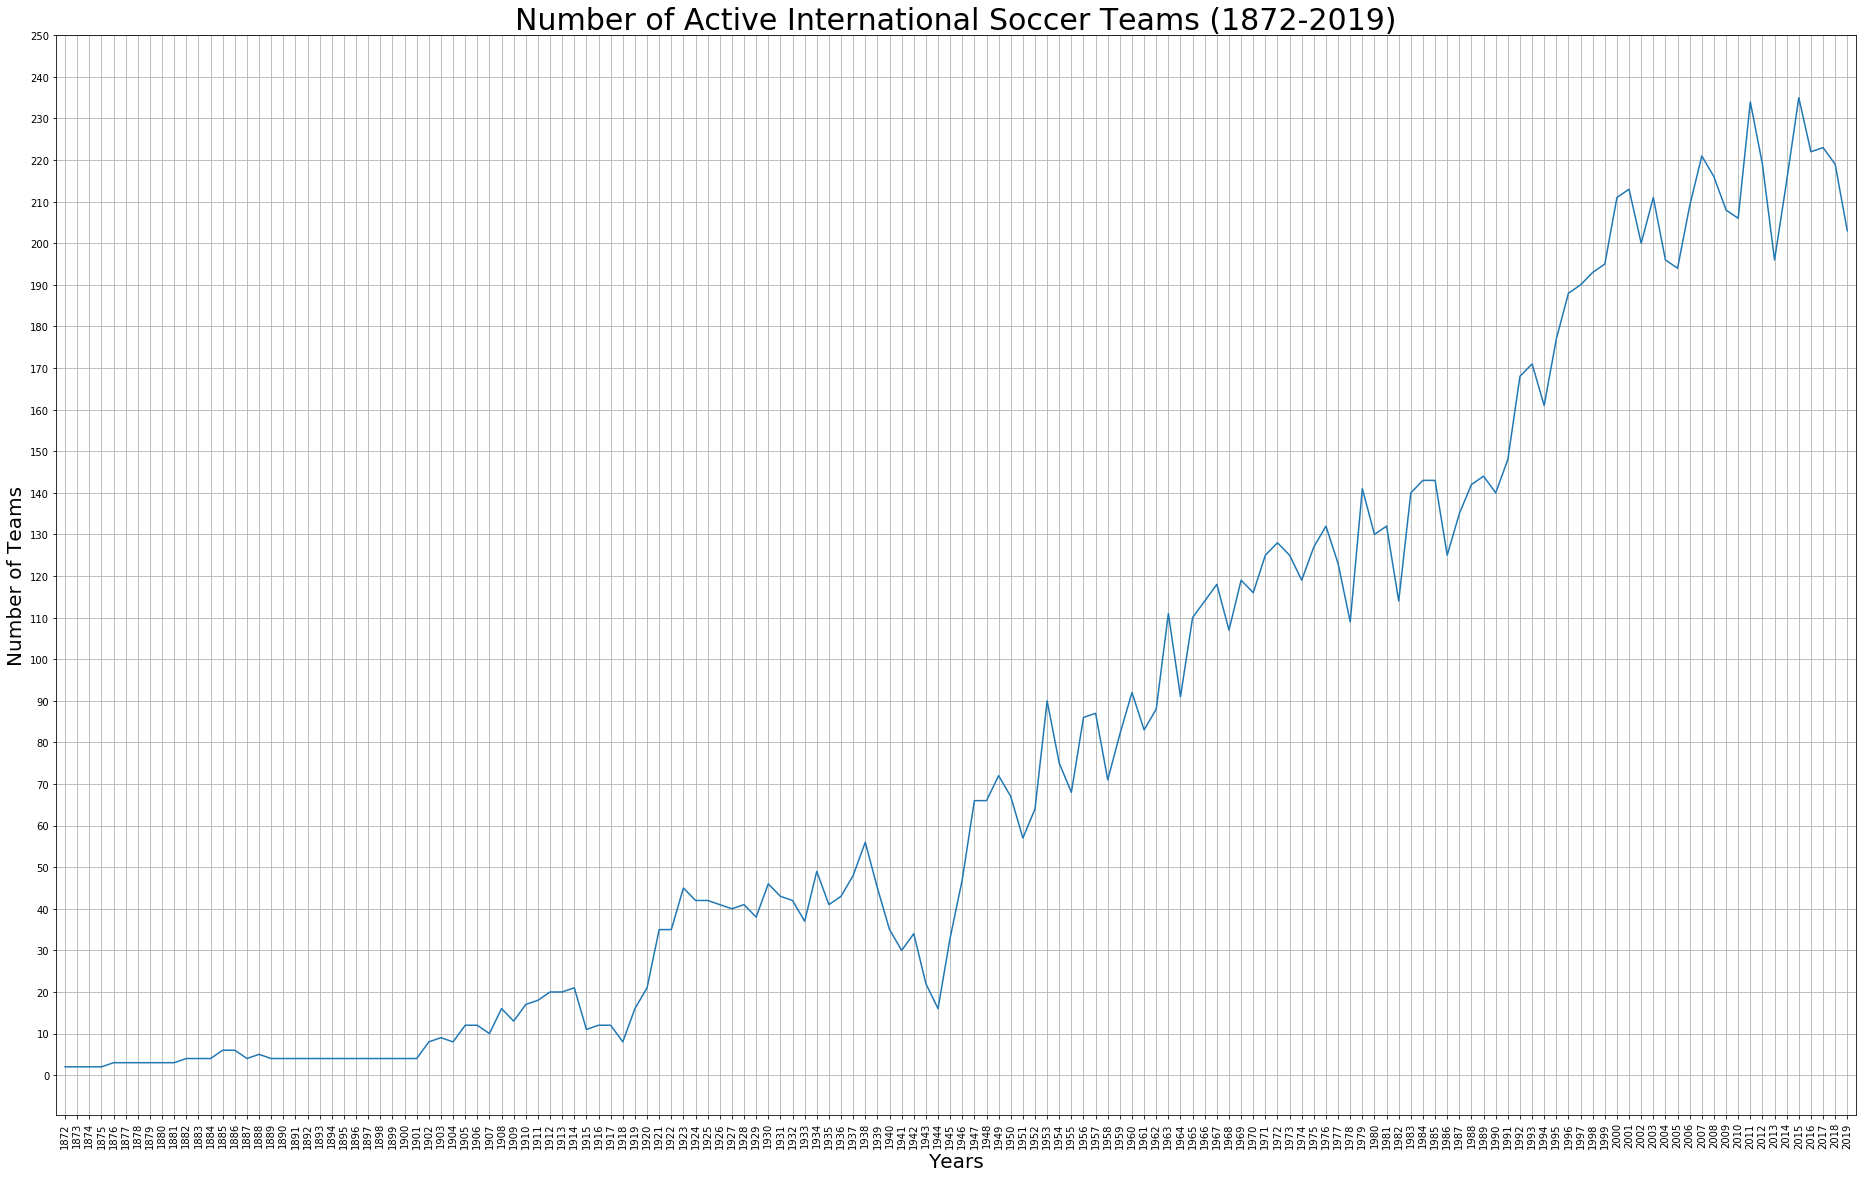

In [3]:
def getNumTeamsYear(year):
    countTeams = list()
    newList = list()
    newThing = df[df['year']==year]
    homie = newThing['home_team'].unique()
    awayy = newThing['away_team'].unique()
    for teamh in homie:
        newList.append(teamh)
    for teama in awayy:
        newList.append(teama)
    newArr = np.array(newList)
    uniqueTeams = np.unique(newArr)
    numTeamsYear = uniqueTeams.size
    return numTeamsYear
def numTeams(years):
    offList = list()
    for num in years:
        num = getNumTeamsYear(num)
        offList.append(num)
    return offList
finalList = numTeams(range(1872,2020))
#format graph
figDiego = plt.figure(figsize=(25,15))
diego = figDiego.add_axes([0.1,0.1,1,1])
diego.plot(range(1872,2020),finalList)
diego.set_xticks(range(1872,2020))
diego.set_xticklabels(range(1872,2020),rotation=90)
diego.set_yticks(range(0,260,10))
diego.set_yticklabels(range(0,260,10))
diego.margins(x=0.005)
diego.set_title("Number of Active International Soccer Teams (1872-2019)",fontsize=30)
diego.set_xlabel("Years", fontsize=20)
diego.set_ylabel("Number of Teams", fontsize=20)
diego.grid()


In the graphs below, we compare the win rate of teams, as well as highest and lowest score based on whether it was a teams home game or an away game. 

#None of the below graphs were difficult conceptually, and they paint a simple picture of how being the away team affects your chances of winning.

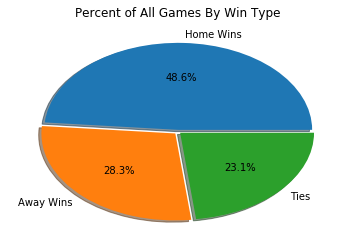

In [4]:
#plots of wins based on type
totalGames=df["home_win"].size
hWin = df["home_win"].sum()/totalGames
aWin = df["away_win"].sum()/totalGames
aTie = df["tie"].sum()/totalGames
expl = [0.02,0.03,0.02]
plt.title("Percent of All Games By Win Type")
plt.pie([hWin,aWin,aTie],labels=["Home Wins","Away Wins", "Ties"], autopct="%1.1f%%",explode=expl, shadow=True)
plt.show()

This graph is comparing all games within the dataset used. It is clear to see that there is a good amount of correlation between wins and being the home team. Close to 50% of all games were won by home teams.

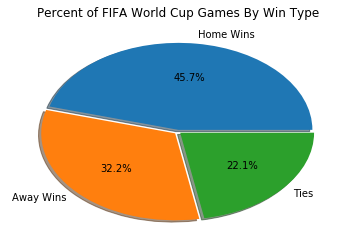

In [5]:
# FIFA Wins
FIFA = df[df["tournament"] == "FIFA World Cup"]
sFIFA = FIFA["home_win"].size
hWin = FIFA["home_win"].sum()/sFIFA
aWin = FIFA["away_win"].sum()/sFIFA
aTie = FIFA["tie"].sum()/sFIFA
plt.title("Percent of FIFA World Cup Games By Win Type")
plt.pie([hWin,aWin,aTie],labels=["Home Wins","Away Wins", "Ties"], autopct="%1.1f%%",explode=expl, shadow=True)
plt.show()

To check that it is not a fluke, when comparing the results of specific tournaments, you notice the same relationship.
For all FIFA World Cup Games, nearly 50% of all games are won by the home team.

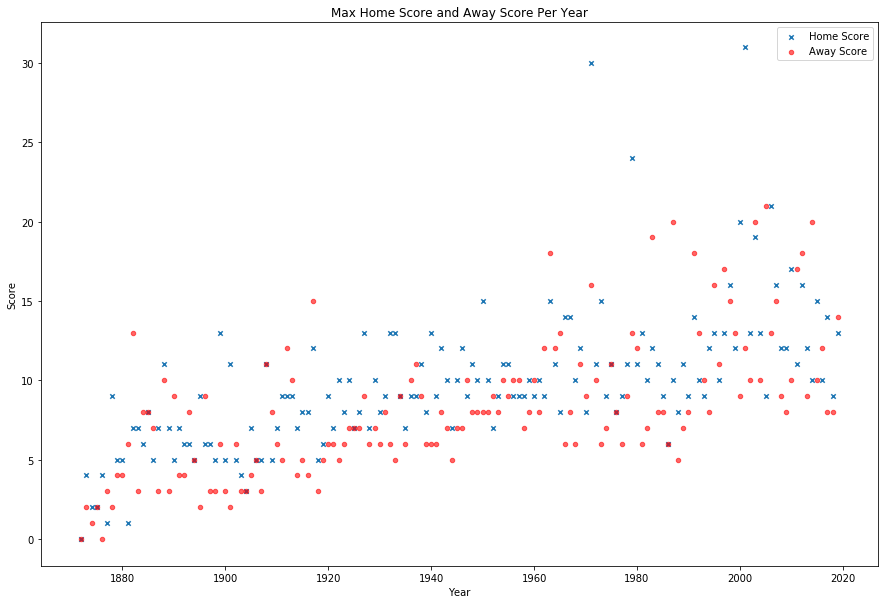

In [6]:
#Max score of every year
grouped = df.set_index(["year","home_team","away_team"],inplace=False)
maxPerYear = grouped[["home_score","away_score"]].max(level=0)
ax1 = maxPerYear.reset_index().plot(kind="scatter",x="year", y="home_score",marker="x", figsize=(15,10))
ax2 = maxPerYear.reset_index().plot(kind="scatter",x="year", y="away_score",color="r", alpha=0.6, ax=ax1, figsize=(15,10))
ax1.set_ylabel("Score")
ax1.set_xlabel("Year")
plt.setp(ax1,title="Max Home Score and Away Score Per Year")
ax1.legend(["Home Score","Away Score"])



Now, looking at the max score of home and away games per year, it can be seen that the overall max scores have increased over the years. One might also observe that the overall concentration of homes scores sits just above the concentration of away scores.

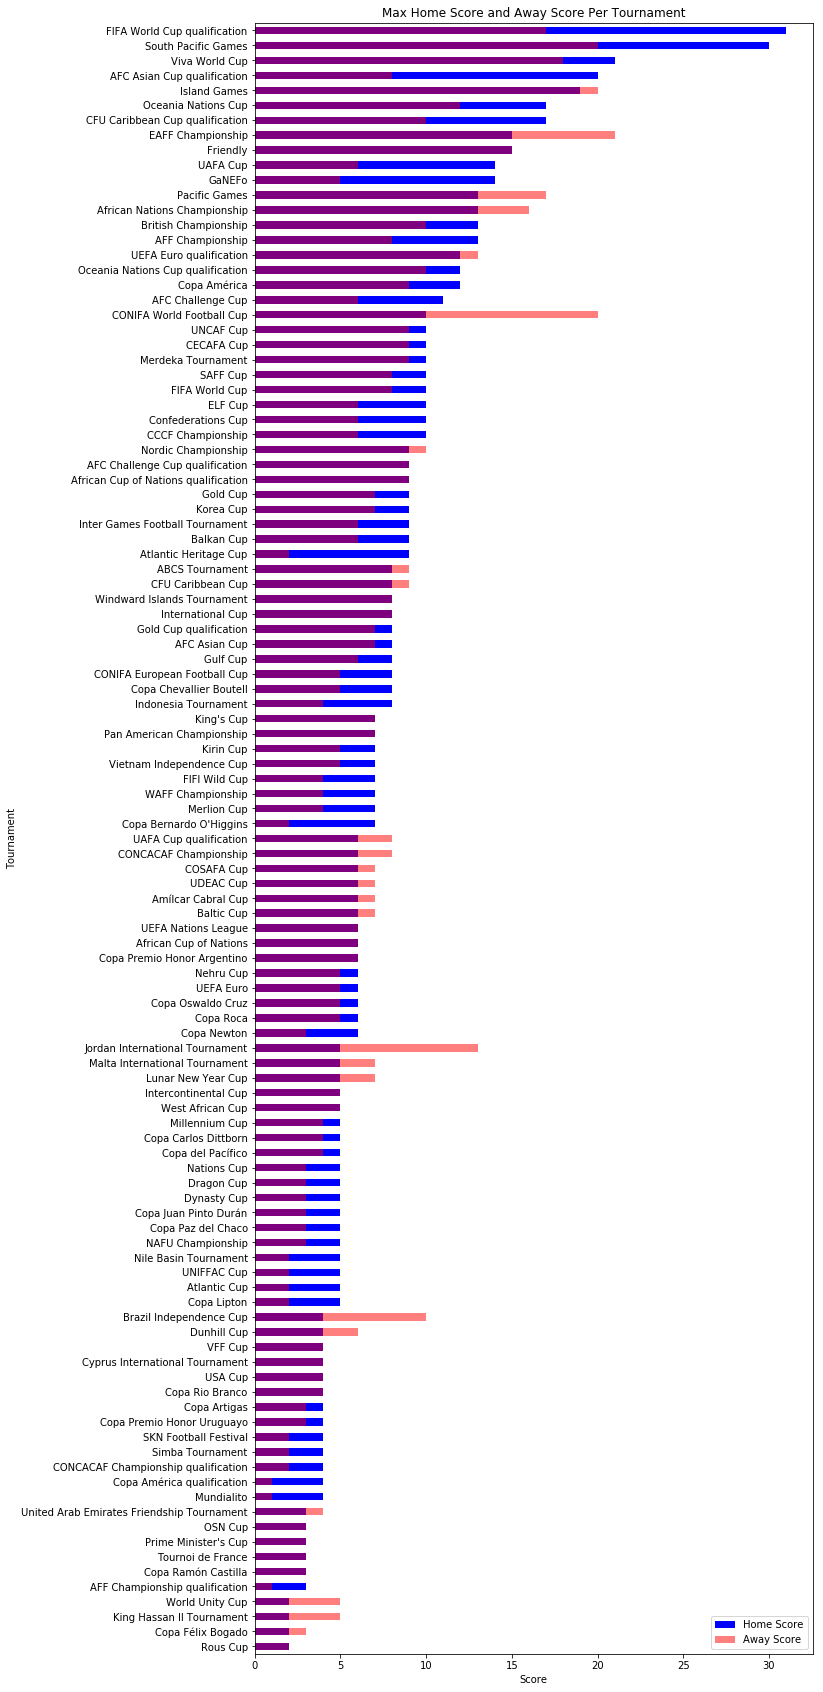

In [7]:
#Max score of every tournament
grouped = df.set_index(["tournament","year"],inplace=False)
maxPerTour = grouped[["home_score","away_score"]].max(level=0)
maxPerTour = maxPerTour.sort_values(by=["home_score","away_score"])
ax1 = maxPerTour.reset_index().plot(kind="barh",x="tournament", color = "b",y="home_score", figsize=(10,30))
ax2 = maxPerTour.reset_index().plot(kind="barh",x="tournament", y="away_score",color="r", alpha=0.5, ax=ax1, figsize=(10,30))
ax1.set_ylabel("Tournament")
ax1.set_xlabel("Score")
plt.setp(ax1,title="Max Home Score and Away Score Per Tournament")
ax1.legend(["Home Score","Away Score"])

Per tournmanent, you can see that the max score of Home Teams tends to be significantly higher than that of the Away Teams highest score. 

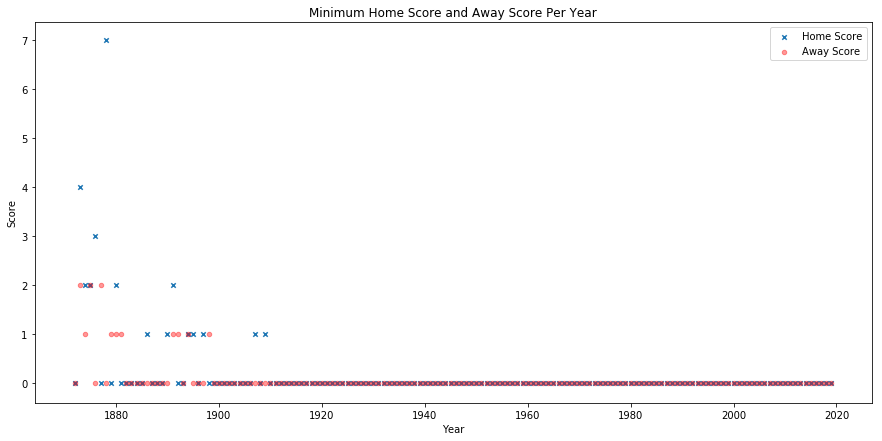

In [8]:
#Min score of every year
grouped = df.set_index(["year","home_team","away_team"],inplace=False)
maxPerYear = grouped[["home_score","away_score"]].min(level=0)
ax1 = maxPerYear.reset_index().plot(kind="scatter",x="year", y="home_score",marker="x",figsize=(15,7))
ax2 = maxPerYear.reset_index().plot(kind="scatter",x="year", y="away_score",color="r", alpha=0.4,ax=ax1, figsize=(15,7))
ax1.set_ylabel("Score")
ax1.set_xlabel("Year")
plt.setp(ax1,title="Minimum Home Score and Away Score Per Year")
ax1.legend(["Home Score","Away Score"])

Less notably, you can see the lowest score of every year, regardless of being the home or away team, is zero.

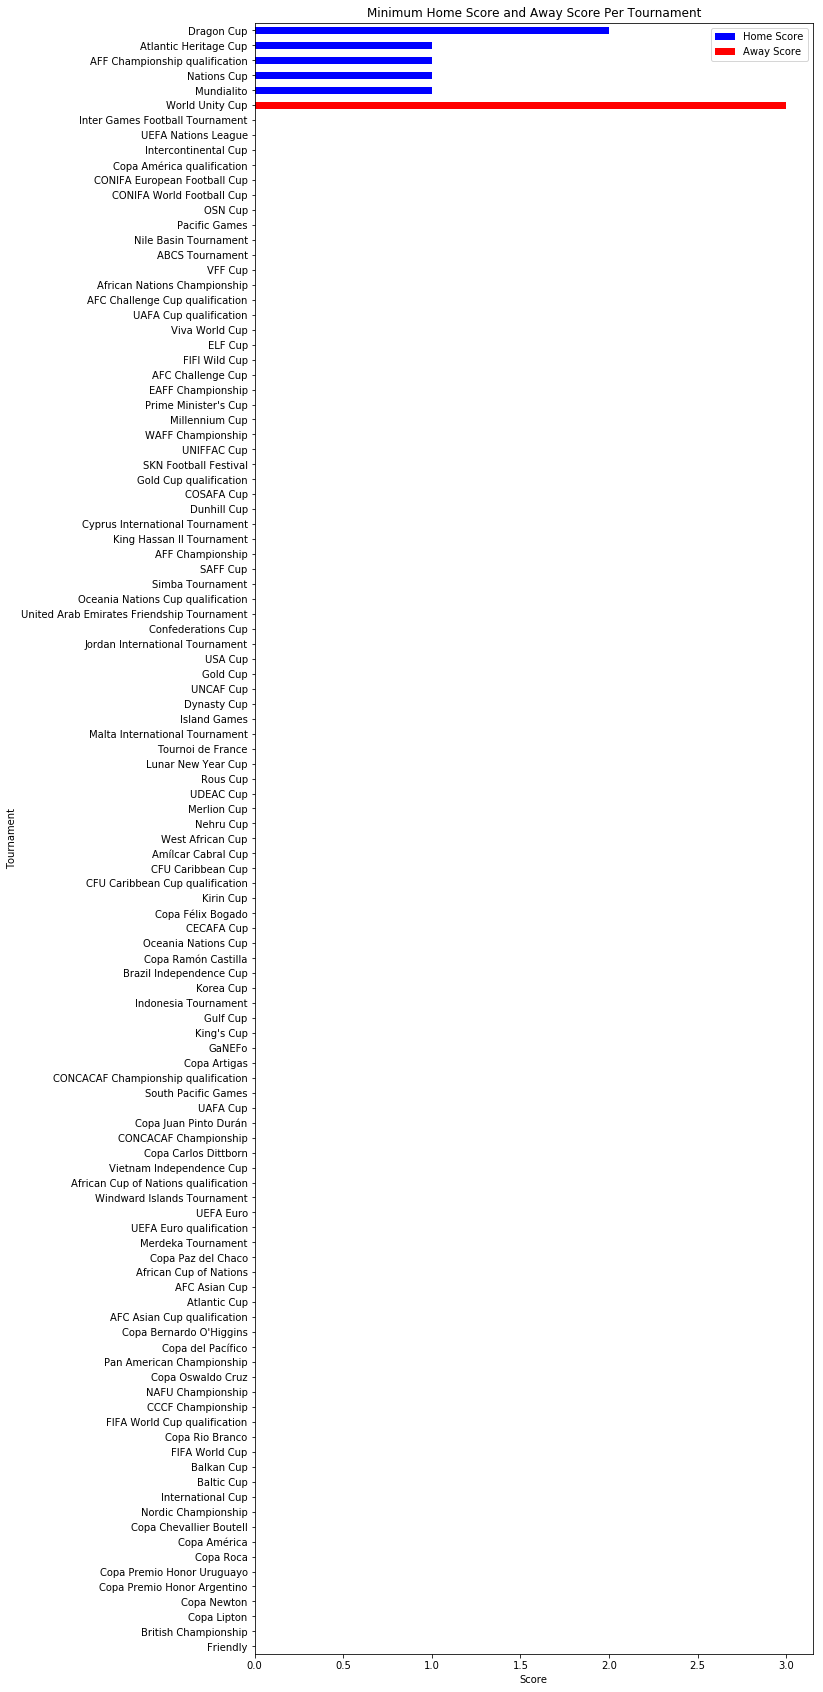

In [9]:
#Min score of every tournament
grouped = df.set_index(["tournament","year"],inplace=False)
maxPerTour = grouped[["home_score","away_score"]].min(level=0)
maxPerTour = maxPerTour.sort_values(["home_score","away_score"])
ax1 = maxPerTour.reset_index().plot(kind="barh",x="tournament", color = "b",y="home_score", figsize=(10,30))
ax2 = maxPerTour.reset_index().plot(kind="barh",x="tournament", y="away_score",color="r", ax=ax1, figsize=(10,30))
ax1.set_ylabel("Tournament")
ax1.set_xlabel("Score")
plt.setp(ax1,title="Minimum Home Score and Away Score Per Tournament")
ax1.legend(["Home Score","Away Score"])

You can observe the same from the lowest score per tournament. Most tournaments have zero as the lowest score form both home and away teams.

In [10]:
print(df.head(10))
no_month = df[['country', 'home_score', 'away_score', 'year', 'home_win', 'away_win', 'tie']]

no_month.describe()

        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   
5 1876-03-25  Scotland     Wales           4           0   Friendly  Glasgow   
6 1877-03-03   England  Scotland           1           3   Friendly   London   
7 1877-03-05     Wales  Scotland           0           2   Friendly  Wrexham   
8 1878-03-02  Scotland   England           7           2   Friendly  Glasgow   
9 1878-03-23  Scotland     Wales           9           0   Friendly  Glasgow   

    country  neutral  year  month  home_win  away_win  tie  
0  Scotland    False  1872     11       0.0       0.0  1.0

,home_score,away_score,year,home_win,away_win,tie
count,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000
mean,1.745709,1.188105,1989.949044,0.486398,0.282671,0.230931
std,1.749145,1.405120,24.182304,0.499821,0.450303,0.421434
min,0.000000,0.000000,1872.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1977.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1997.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2008.000000,1.000000,1.000000,0.000000
max,31.000000,21.000000,2019.000000,1.000000,1.000000,1.000000


count      109.000000
mean       374.669725
std       1760.569516
min          2.000000
25%         15.000000
50%         49.000000
75%        142.000000
max      16911.000000
dtype: float64

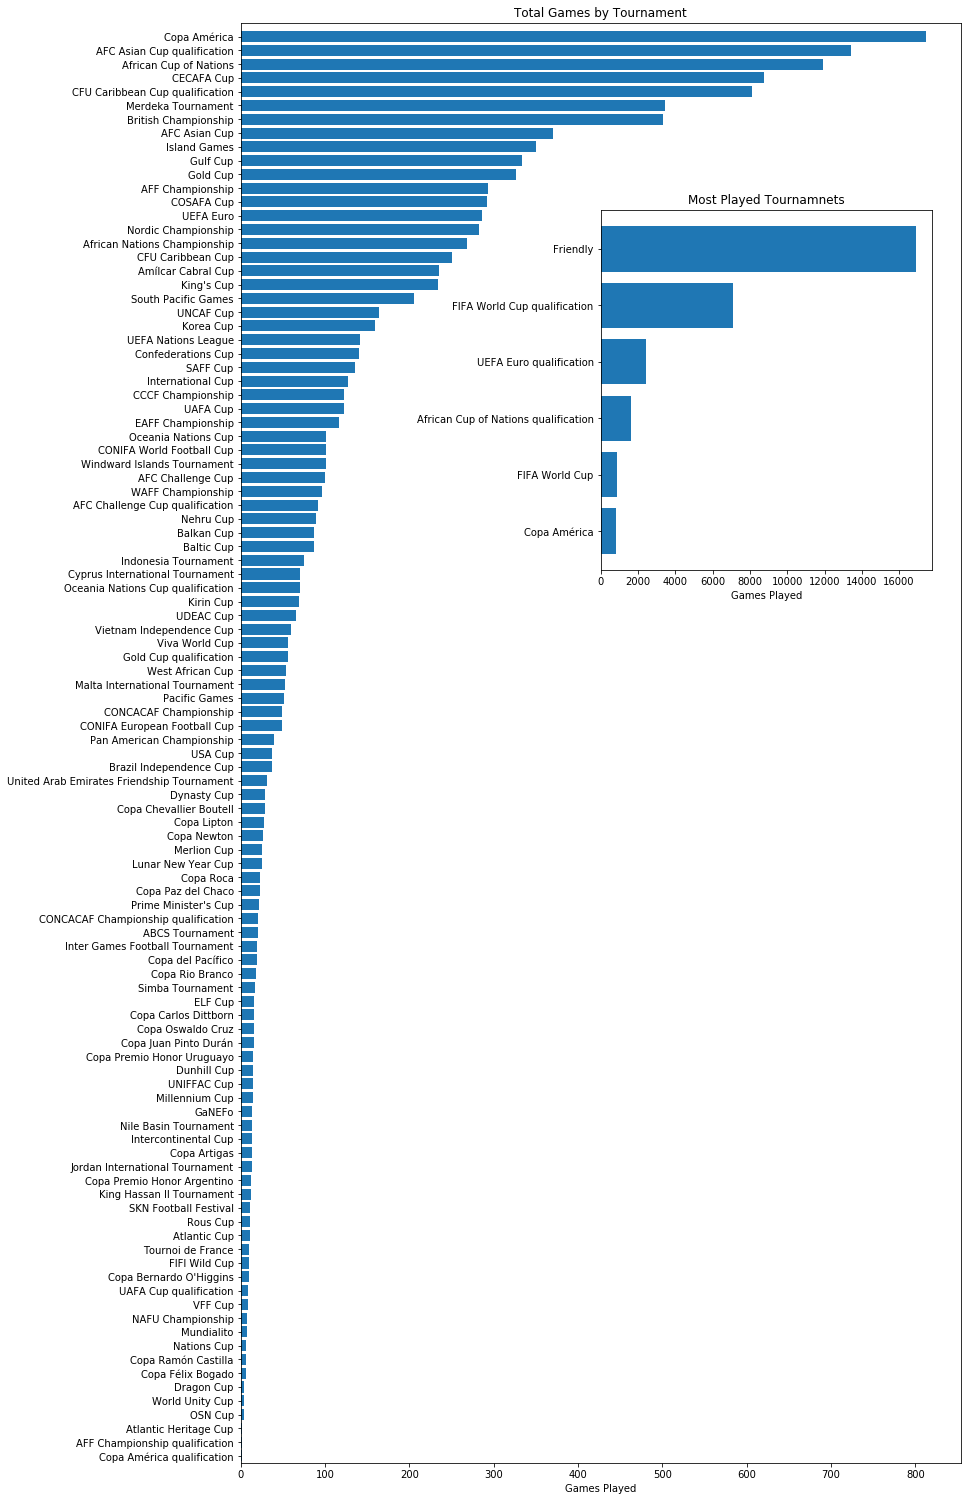

In [11]:
tournament_counts = pd.value_counts(df['tournament'].values, sort=True)

fig = plt.figure(figsize=(10,20))
ax = fig.add_axes([0.1,0.1,1,1])
in_ax = fig.add_axes([0.6,0.72,0.46,0.25])

ax.barh(tournament_counts[-1:4:-1].index, tournament_counts[-1:4:-1].values)
ax.set_ylim(-0.5,len(tournament_counts[5:]))
ax.set_title('Total Games by Tournament')
ax.set_xlabel('Games Played')
in_ax.barh(tournament_counts[5::-1].index, tournament_counts[5::-1])
in_ax.set_title('Most Played Tournamnets')
in_ax.set_xlabel('Games Played')
tournament_counts.describe()

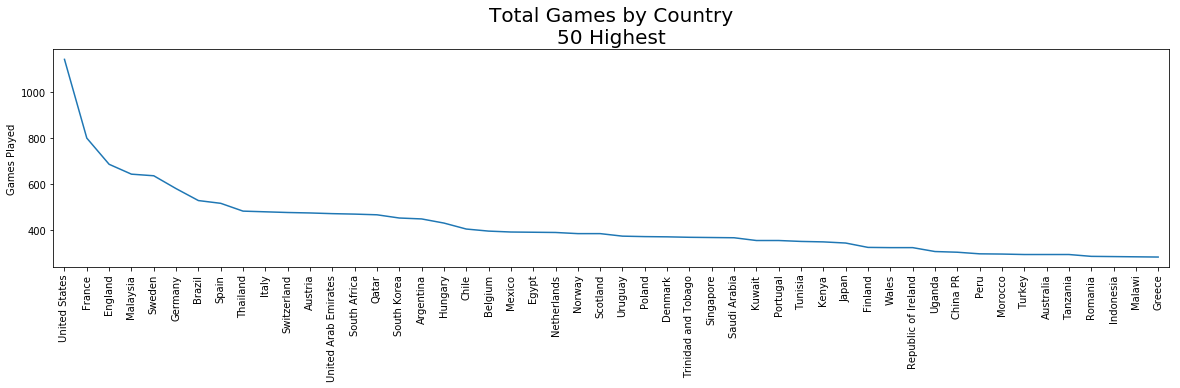

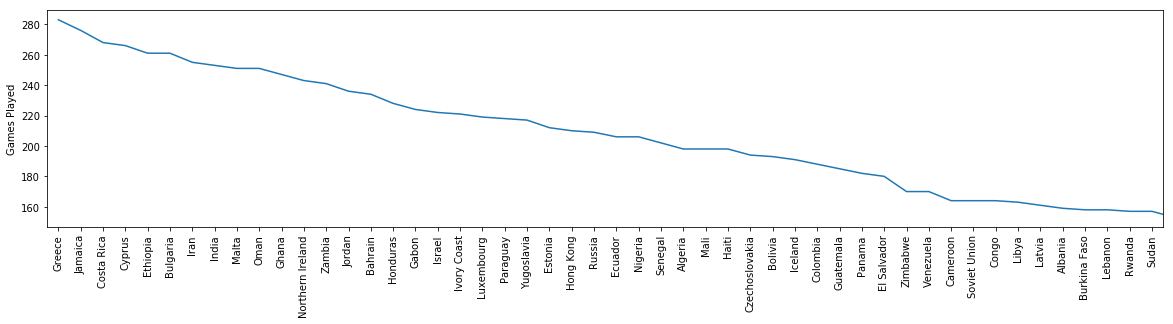

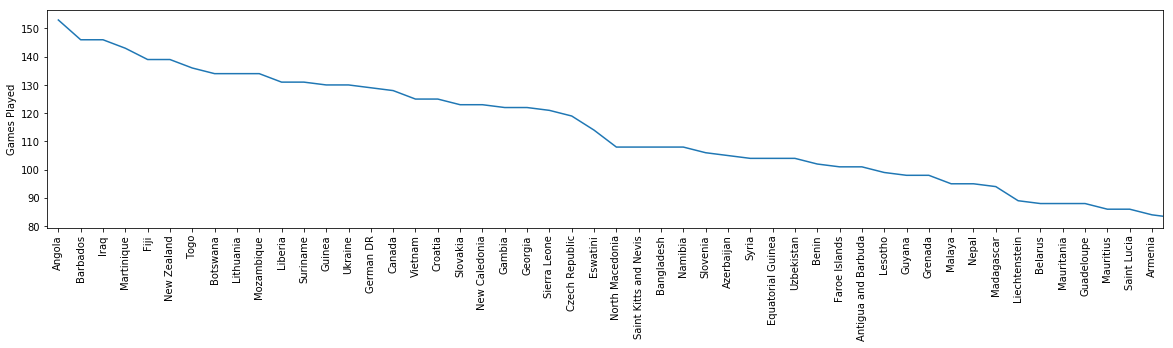

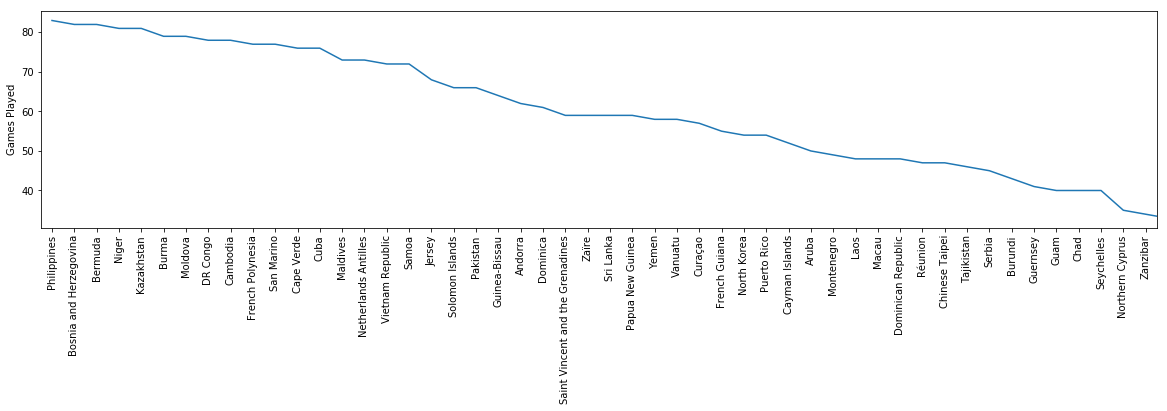

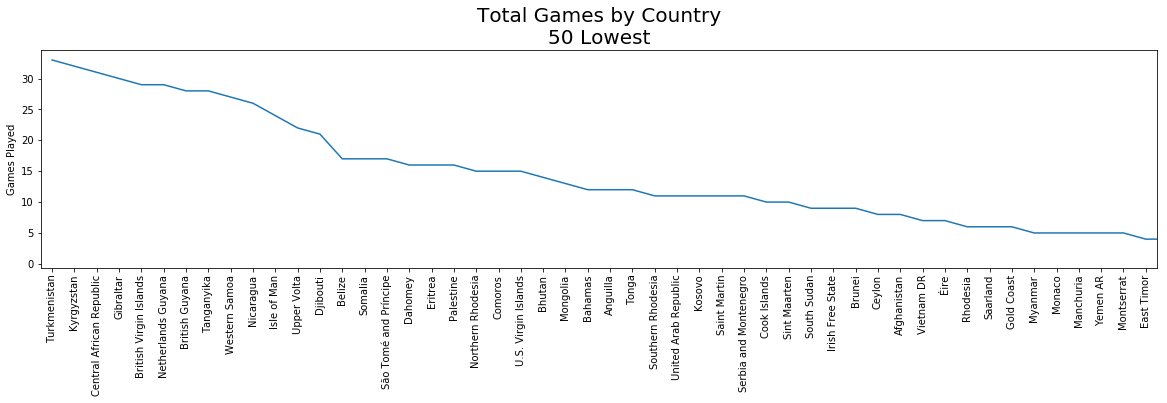

count     266.000000
mean      153.530075
std       160.946262
min         1.000000
25%        33.250000
50%       103.000000
75%       221.750000
max      1144.000000
Name: country, dtype: float64

In [12]:
country_counts = pd.value_counts(df['country'], sort=True)

plt.figure(figsize=(20,4))
plt.plot(country_counts[:50].index, country_counts[:50].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90)
plt.title('Total Games by Country\n50 Highest', size=20)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[49:100].index, country_counts[49:100].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[99:150].index, country_counts[99:150].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[149:200].index, country_counts[149:200].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[199:].index, country_counts[199:].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90)
plt.title('Total Games by Country\n50 Lowest', size=20)
plt.ylabel('Games Played')
plt.show()
country_counts.describe()

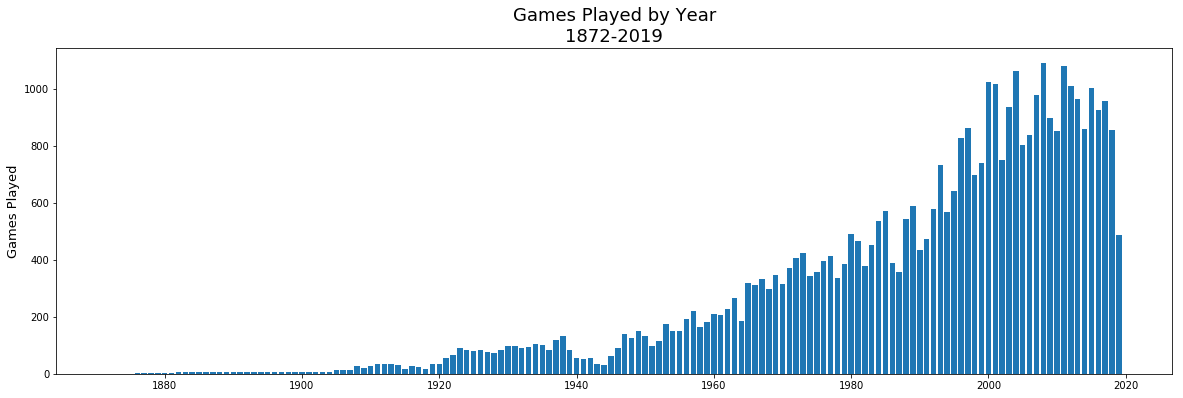

count     148.000000
mean      275.939189
std       325.421302
min         1.000000
25%        16.750000
50%       111.000000
75%       428.500000
max      1091.000000
Name: year, dtype: float64

In [13]:
games_year = pd.value_counts(df['year'])

plt.figure(figsize=(20,6))
plt.bar(games_year.index, games_year.values)
plt.title('Games Played by Year\n1872-2019', size=18)
plt.ylabel('Games Played', size=13)
plt.show()
games_year.describe()

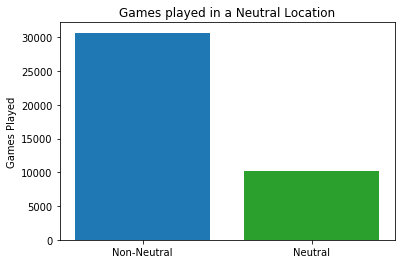

count     40839
unique        2
top       False
freq      30680
Name: neutral, dtype: object
count        2.000000
mean     20419.500000
std      14510.538257
min      10159.000000
25%      15289.250000
50%      20419.500000
75%      25549.750000
max      30680.000000
Name: neutral, dtype: float64


In [14]:
games_neutral = pd.value_counts(df['neutral'])

plt.bar(['Non-Neutral', 'Neutral'], games_neutral.values, color=['tab:blue', 'tab:green'])
plt.ylabel('Games Played')
plt.title('Games played in a Neutral Location')
plt.show()
print(df['neutral'].describe())
print(games_neutral.describe())

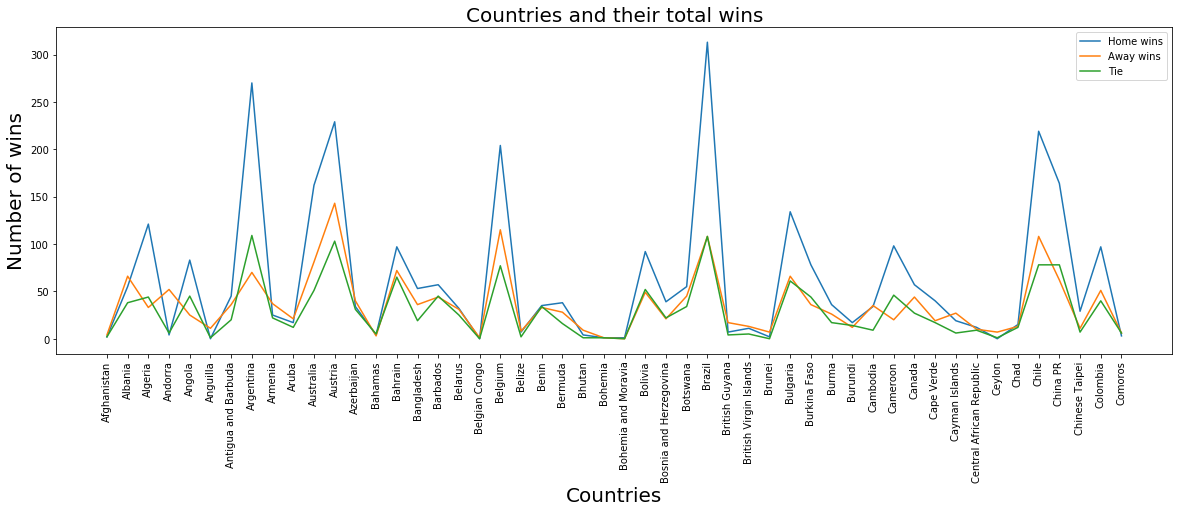

In [15]:
plt.figure(figsize=(20,6)) #(60,6) for all
#print("Countries participated:")
#print(df["country"].nunique())
df_home_win = df["home_win"].groupby(df["country"]).sum()
df_away_win = df["away_win"].groupby(df["country"]).sum()
df_tie = df["tie"].groupby(df["country"]).sum()
plt.plot(df_home_win[:50]) 
plt.plot(df_away_win[:50])
plt.plot(df_tie[:50])
plt.title("Countries and their total wins",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Number of wins",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home wins","Away wins","Tie"])
plt.show()

The above graph displays the total number of wins for a particular country when in home country and also away from home country
for the years 1872 to 2017.
If we analyse the graphs we can see that the perfomance of any contry is better when played at their home country.
A random of 50 contries were chosen to display the data.

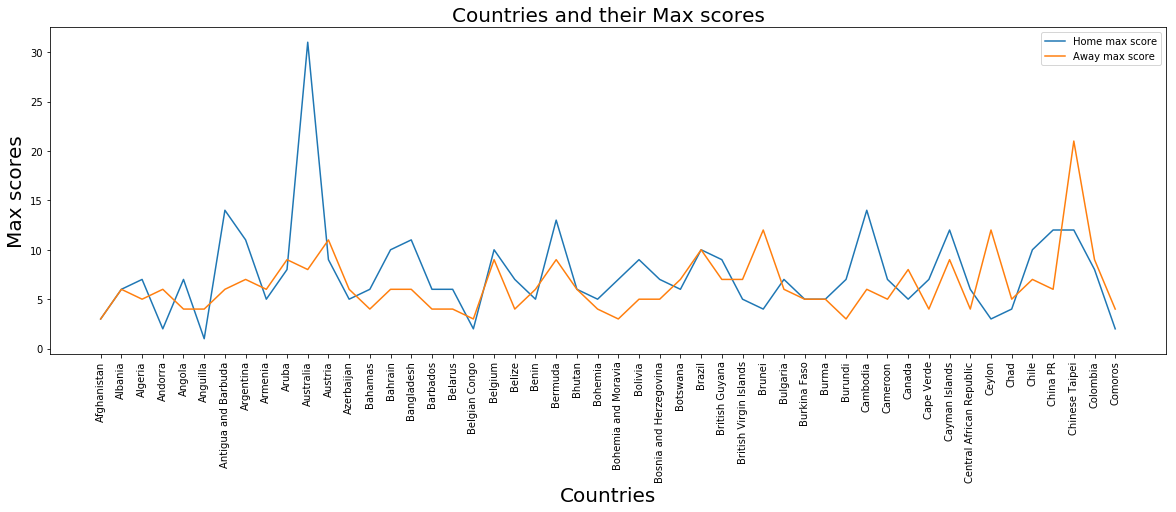

In [16]:
plt.figure(figsize=(20,6)) #(60,6) for all
df_home_max = df["home_score"].groupby(df["country"]).max()
df_away_max = df["away_score"].groupby(df["country"]).max()
plt.plot(df_home_max[:50]) 
plt.plot(df_away_max[:50])
plt.title("Countries and their Max scores",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Max scores",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home max score","Away max score"])
plt.show()

The above graph displays the MAX scores for a particular country when in home country and also away from home country.
If we analyse the graphs we can see it's a mixed result means that few contries scored max at their home place and few 
others performed well far away from their home contry.
A random of 50 contries were chosen to display the data. 

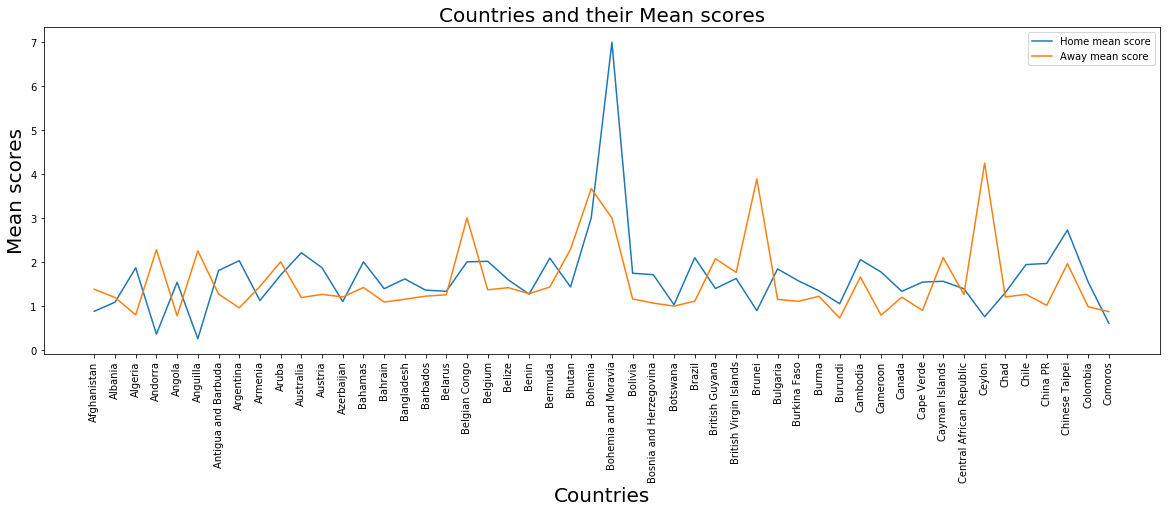

In [17]:
plt.figure(figsize=(20,6)) #(60,6) for all
df_home_mean = df["home_score"].groupby(df["country"]).mean()
df_away_mean = df["away_score"].groupby(df["country"]).mean()
plt.plot(df_home_mean[:50]) 
plt.plot(df_away_mean[:50])
plt.title("Countries and their Mean scores",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Mean scores",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home mean score","Away mean score"])
plt.show()

In [18]:
#The above graph displays the average scores for a particular country when in home country and also away from home country.
#If we analyse the graphs we can see the average is very low. This is due to the fact: in most of the matches,the scores are 
#around 0 or 1 #If we consider only the matches with score not equal to zero the average will be somewhat high.

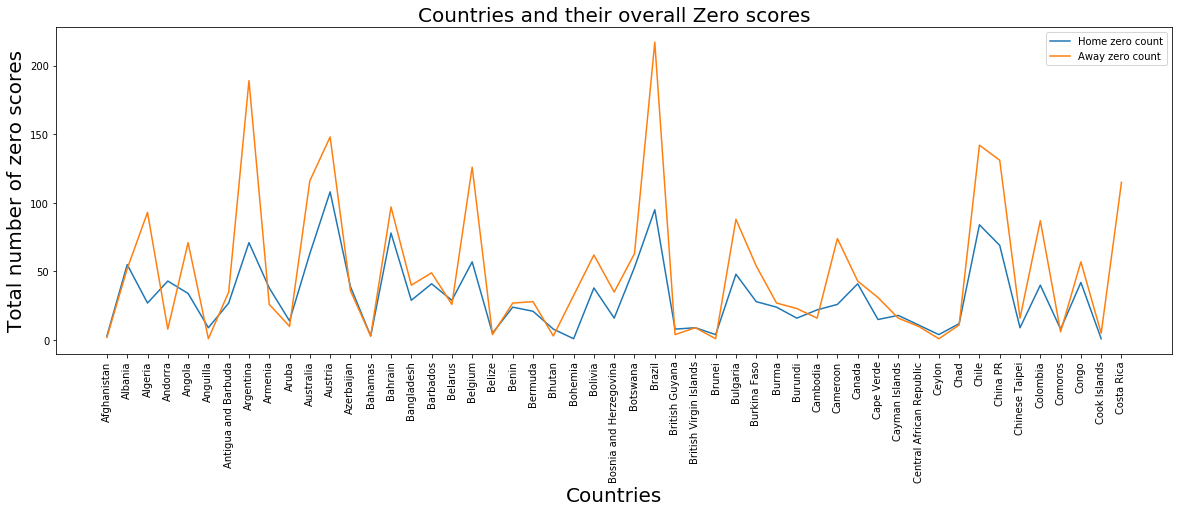

In [19]:
plt.figure(figsize=(20,6)) #(60,6) for all
df_home_zero = df[df["home_score"]==0].groupby(df["country"]).count()
df_away_zero = df[df["away_score"]==0].groupby(df["country"]).count()
plt.plot(df_home_zero['home_score'][:50]) 
plt.plot(df_away_zero['home_score'][:50])
plt.title("Countries and their overall Zero scores",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Total number of zero scores",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home zero count","Away zero count"])
plt.show()

This graph is a kind of proof to the above mentioned scenario. Here we can see so many contries are having more number zero 
scores. Also we can see more of zero scores when played far from home town.
 

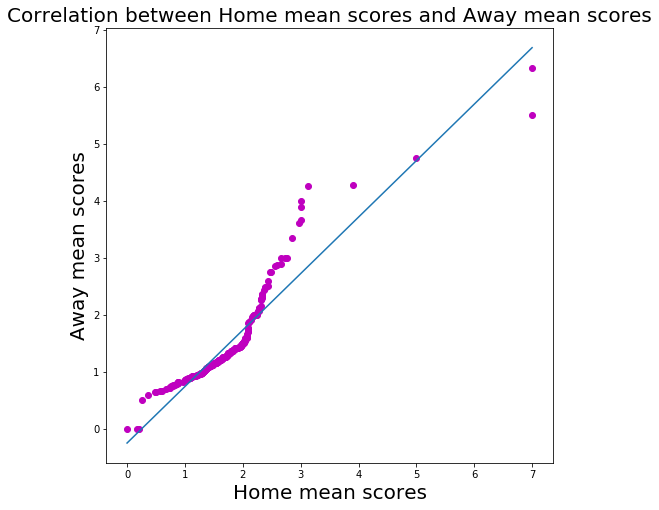

In [20]:
plt.figure(figsize=(8,8))
df_home_mean_sort = df_home_mean.sort_values(ascending=False)
df_away_mean_sort = df_away_mean.sort_values(ascending=False)
plt.scatter(df_home_mean_sort,df_away_mean_sort,c='m')
plt.title("Correlation between Home mean scores and Away mean scores",size = 20)
plt.xlabel("Home mean scores",size = 20)
plt.ylabel("Away mean scores",size = 20)
z = np.polyfit(df_home_mean_sort,df_away_mean_sort,1)
p = np.poly1d(z)
plt.plot(df_home_mean_sort,p(df_home_mean_sort))
plt.show()

The above graph shows Correlation between Home mean scores and Away mean scores. 
The straight line represents the least square regression line.

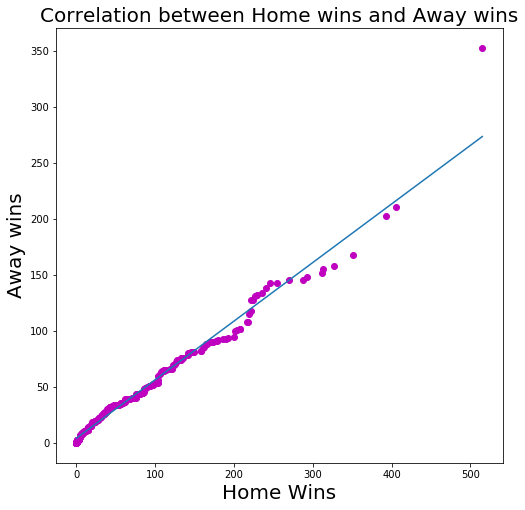

In [21]:
plt.figure(figsize=(8,8))
df_home_win_sort = df_home_win.sort_values(ascending=False)
df_away_win_sort = df_away_win.sort_values(ascending=False)
plt.scatter(df_home_win_sort,df_away_win_sort,c='m')
plt.title("Correlation between Home wins and Away wins",size = 20)
plt.xlabel("Home Wins",size = 20)
plt.ylabel("Away wins",size = 20)
z = np.polyfit(df_home_win_sort,df_away_win_sort,1)
p = np.poly1d(z)
plt.plot(df_home_win_sort,p(df_home_win_sort))
plt.show()

The above graph shows Correlation between Home wins and Away wins. 
The straight line represents the least square regression line.
Home country wins are more than away home.